In [159]:
import numpy as np

lc = np.genfromtxt("data/PG1302_CRTS.dat", names="mjd, mag, magerr", delimiter=",", skip_header=1)
#print(str(lc['mag']))

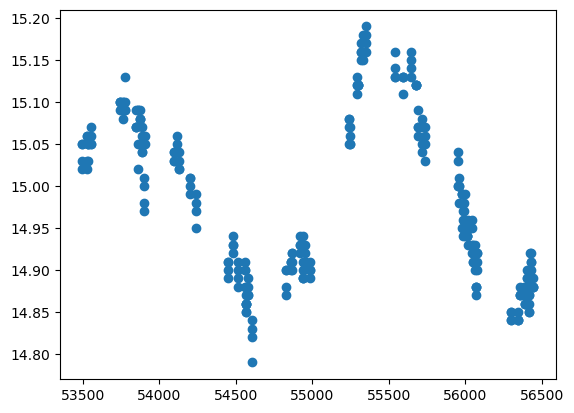

In [160]:
import matplotlib.pyplot as plt

t = lc["mjd"]
mag = lc["mag"]
magerr = lc['magerr']

plt.scatter(t, mag)
plt.show()

In [161]:
from scipy.stats import binned_statistic

# Use binned_statistic to calculate mean within each bin
def get_binned_statistic(num_bins, t, mag):
    bin_mag, bin_edges, binnumber = binned_statistic(t, mag, statistic=np.nanmean, bins=num_bins)
    bin_magerr, bin_edges, binnumber = binned_statistic(t, magerr, statistic=np.nanmean, bins=num_bins)
    bin_width = (bin_edges[1] - bin_edges[0])
    bin_t = bin_edges[1:] - bin_width/2

    filter = np.isfinite(bin_mag)
    #print(str(filter[:10]))
    bin_mag = bin_mag[filter]
    bin_t = bin_t[filter]
    bin_magerr = bin_magerr[filter]
    return (bin_t, bin_mag, bin_magerr)
    
#plt.scatter(bin_t, bin_mag)
#plt.show()

num_bins=3000 i=0
num_bins=1000 i=1
num_bins=500 i=2
num_bins=100 i=3


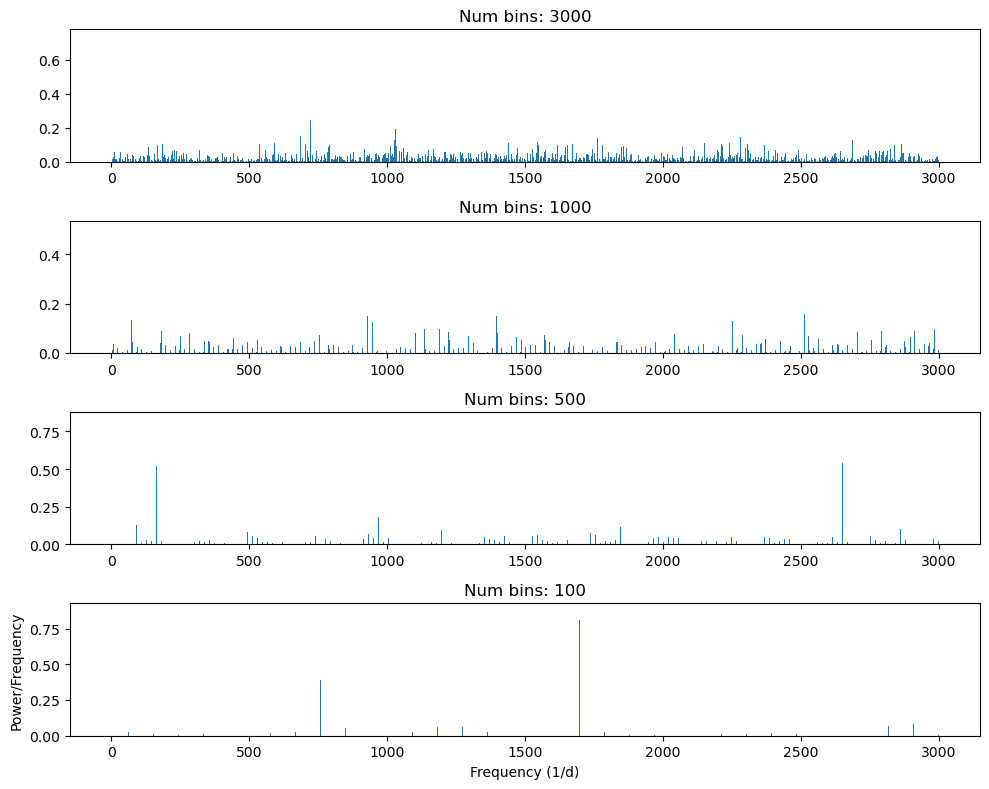

In [176]:
import astropy.units as u
from astropy.timeseries import LombScargle
# Initialise the subplot function using number of rows and columns 
figure, axis = plt.subplots(4, 1, figsize=(10,8)) 
plt.xlabel("Frequency (1/d)")
plt.ylabel("Power/Frequency")
plt.title("Lomb-Scargle Periodogram")

for i, num_bins in enumerate([3000, 1000, 500, 100]):
    freqs = np.linspace(1,3000,num_bins) 
    #print(str(freqs[:10]))
    #print(str(bin_t[:10]))
    #print(str(bin_mag[:10]))
    print("num_bins=" + str(num_bins) + " i=" + str(i))
    bin_t, bin_mag, bin_magerr = get_binned_statistic(num_bins, t, mag)
    ls = LombScargle(bin_t * u.day, bin_mag * u.mag, bin_magerr * u.mag)
    powers = ls.power(freqs/ u.day)
    #print(str(frequency))
    axis[i].bar(freqs, powers) 
    axis[i].set_title("Num bins: " + str(num_bins)) 

plt.tight_layout()
plt.show()
# TODO: Find the FAP (False probability)